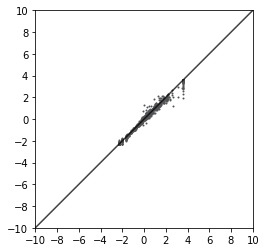

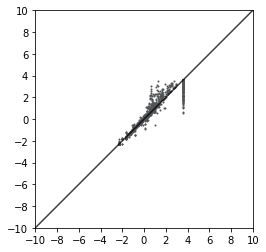

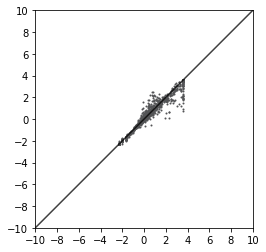

In [79]:
import pandas as pd
import numpy as np
from data_preprocessing import *
import matplotlib.pyplot as plt
# %matplotlib inline  
set_names = ['INDU-HAND-RAND',
             'SAT_Competition_RACE_HAND',
             'SAT_Competition_RACE_RAND',
             'SAT_Competition_RACE_INDU',
             'IBM-SWV',
             'IBM-ALL',
             'SWV',
             'SAT_Competition_RACE_RAND_SAT']
datasets = [
#  'INDU-HAND-RAND-minisat',
#   'SAT_Competition_RACE_HAND-minisat',
#   'SAT_Competition_RACE_RAND-minisat',
#   'SAT_Competition_RACE_INDU-minisat',
  'IBM-SWV-minisat',
#   'IBM-ALL-minisat',
#   'SWV-minisat',
#   'SAT_Competition_RACE_INDU-cryptominisat',
  'IBM-SWV-cryptominisat',
#   'IBM-ALL-cryptominisat',
#   'SWV-cryptominisat',
#   'SAT_Competition_RACE_INDU-spear',
  'IBM-SWV-spear',
#   'IBM-ALL-spear',
#   'SWV-spear',
#   'SAT_Competition_RACE_RAND_SAT-tnm',
#   'SAT_Competition_RACE_RAND_SAT-saps'
]
# models = ['plain_ridge',
#           'plain_ridge_with_interactions',
# #           'ridge_with_ffs_0',
# #           'ridge_with_ffs_1',
#           'ridge_with_ffs_2',
# #           'ridge_with_rfe_0',
# #           'ridge_with_rfe_1',
#           'ridge_with_rfe_2',
# #           'ridge_with_rfe_3',
#           'ridge_with_rfe_4',
#           'ridge_with_rfe_cv_0',
#          ]
models = ['rf_5']
for dataset in datasets:
    for model in models:
#         model = 'plain_ridge'
        solver_times = pd.read_csv('data/' + dataset + '.csv', names=['INSTANCE_ID', 'SOLVER_TIME'])['SOLVER_TIME'].get_values()
        Y = log10_transform(solver_times)

        predictions = np.load('rf_predictions/' + dataset + '_' + model + '.npy')
        fig, ax = plt.subplots()
        ax.scatter(Y, predictions, c='#535456', s=1)
#         lims = [
#             np.floor(np.min([ax.get_xlim(), ax.get_ylim()])), # min of both axes
#             np.ceil(np.max([ax.get_xlim(), ax.get_ylim()])),  # max of both axes
#         ]
        lims = [
            -10, # min of both axes
            10,  # max of both axes
        ]
        ax.set_xlim(lims)
        ax.set_ylim(lims)
        ax.plot(lims, lims, 'k-', alpha=0.75)
        ax.set_aspect('equal')
#         plt.xticks(np.arange(lims[0], lims[1] + 1, step=10))
#         plt.yticks(np.arange(lims[0], lims[1] + 1, step=10))
        plt.xticks(np.arange(-10, 11, step=2))
        plt.yticks(np.arange(-10, 11, step=2))
        plt.savefig(dataset + '---' + model)
        plt.show()

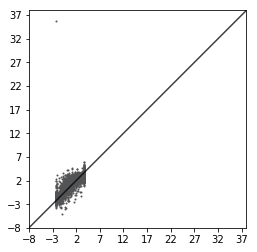

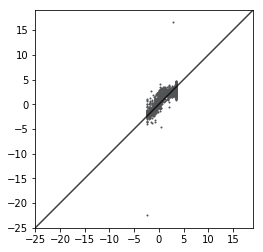

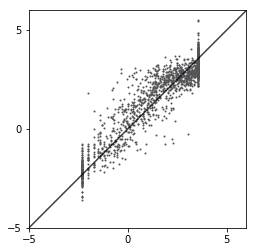

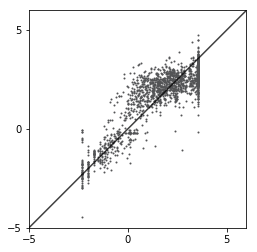

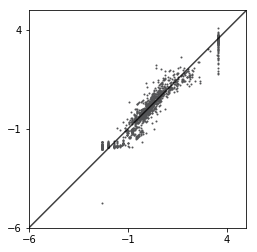

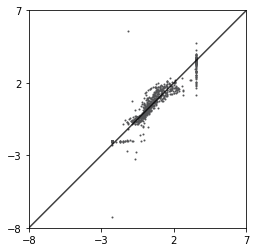

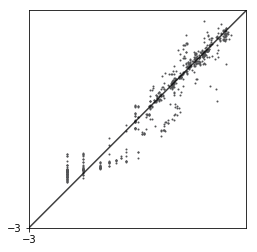

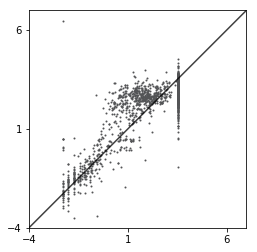

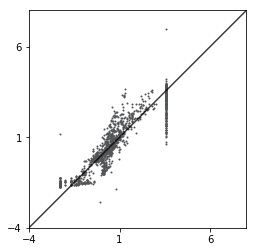

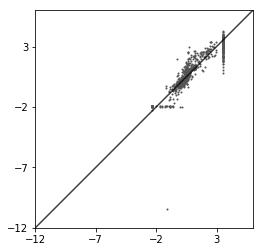

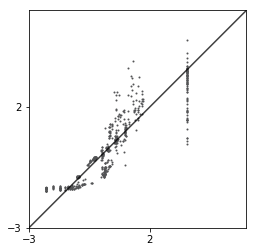

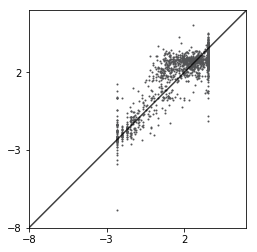

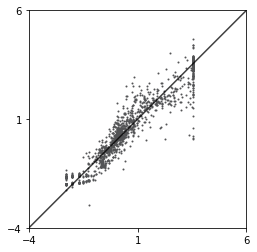

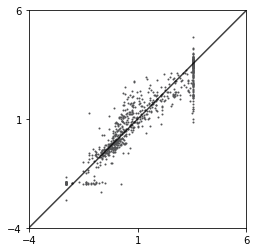

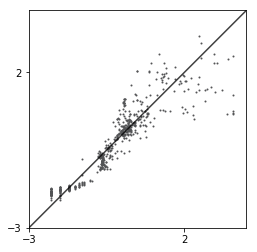

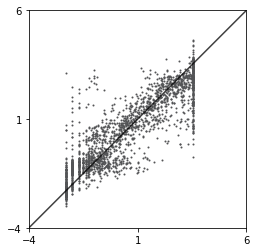

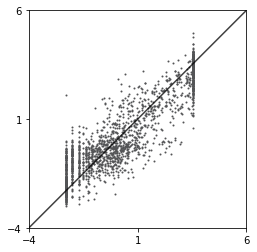

In [62]:
for dataset in datasets:
    model = 'ridge_with_rfe_3'
    solver_times = pd.read_csv('data/' + dataset + '.csv', names=['INSTANCE_ID', 'SOLVER_TIME'])['SOLVER_TIME'].get_values()
    Y = log10_transform(solver_times)

    predictions = np.load('ridge_predictions/' + dataset + '_' + model + '.npy')
    fig, ax = plt.subplots()
    ax.scatter(Y, predictions, c='#535456', s=1)
    lims = [
        np.floor(np.min([ax.get_xlim(), ax.get_ylim()])), # min of both axes
        np.ceil(np.max([ax.get_xlim(), ax.get_ylim()])),  # max of both axes
    ]
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.plot(lims, lims, 'k-', alpha=0.75)
    ax.set_aspect('equal')
    plt.xticks(np.arange(lims[0], lims[1] + 1, step=5))
    plt.yticks(np.arange(lims[0], lims[1] + 1, step=5))
    plt.show()

## 